In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os,time
import numpy as np
import matplotlib.pyplot as plt 
from charon import propa
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()

In [3]:
#info of DM
channel = 'numunumu'
mass    = 10 * 1e15
process = 'ann' #annihilation default

#info of neutrino spectrum binning. 
Emin         = 1.
Emax         = mass
nodes        = 100
bins         = 300

#info of oscillation parameters
theta_12=33.82
theta_13=8.6
theta_23=48.6
delta_m_12=7.39e-5
delta_m_13=2.528e-3
delta = 221.


#linear space of outcoming energies 
logscale = False #default
#include interactions
interactions = True #default

#construct the flux object.
Flux_nu = propa.NuFlux(channel,mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')

In [4]:
Flux_W = propa.NuFlux("WW",mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')
Flux_b = propa.NuFlux("bb",mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')
Flux_tau = propa.NuFlux("tautau",mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')
Flux_mu = propa.NuFlux("mumu",mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')

In [5]:
flux_ini_Halo_nu = Flux_nu.iniFlux('Halo')
flux_ini_Halo_W = Flux_W.iniFlux('Halo')
flux_ini_Halo_tau = Flux_tau.iniFlux('Halo')
flux_ini_Halo_mu = Flux_mu.iniFlux('Halo')
flux_ini_Halo_b = Flux_b.iniFlux('Halo')


Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


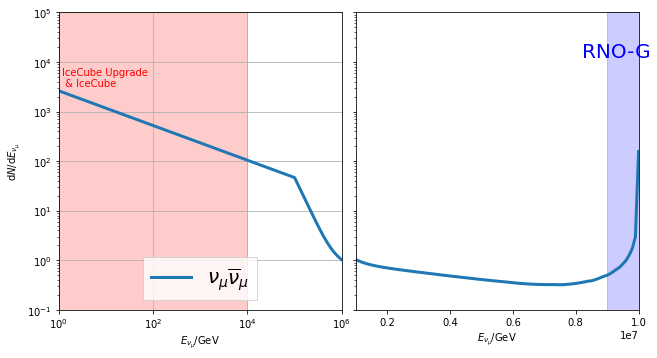

In [6]:
from matplotlib.gridspec import GridSpec

fig, [ax_log, ax_lin] = plt.subplots(1, 2, sharey=True, figsize=(9, 5))

plt.rcParams.update({'axes.titlesize': 18})
plt.rcParams.update({'axes.labelsize': 30})
plt.rcParams.update({'xtick.labelsize' : 14})
plt.rcParams.update({'ytick.labelsize' : 14})
plt.rcParams.update({'legend.fontsize' : 16})
#    plt.rcParams.update({'figure.dpi': 600.})
plt.rcParams.update({'lines.linewidth': 3})
font = {'family': 'serif'}
#fig  = plt.figure(figsize=(9, 5))
ax_log.set_yscale("log")
ax_log.set_xscale("log")
#x = Flux_nu.iniE()/mass
x = Flux_nu.iniE()*1e-9
ax_log.plot(x,flux_ini_Halo_nu['nu_mu'],linewidth=3.0,label=r'$\nu_\mu\overline{\nu}_\mu$')
ax_lin.plot(x,flux_ini_Halo_nu['nu_mu'],linewidth=3.0,label=r'$\nu_\mu\overline{\nu}_\mu$')
ax_lin.set_yscale("log")

#ax.plot(x,flux_ini_Halo_W['nu_mu'],linewidth=3.0,label=r'$W^+W^-$')
#ax.plot(x,flux_ini_Halo_tau['nu_mu'],linewidth=3.0,label=r'$\tau^+\tau^-$')
#ax.plot(x,flux_ini_Halo_b['nu_mu'],linewidth=3.0,label=r'$b\overline{b}$')
#ax.plot(x,flux_ini_Halo_tau['nu_mu'],linewidth=3.0,label=r'$\mu^+\mu^-$')

ax_log.set_xlabel(r'${E_{\nu_\mu}}/{\rm GeV}$', fontdict=font)
ax_log.set_ylabel(r'$ {\rm d} N / {\rm d} E_{\nu_\mu} $', fontdict=font)
ax_lin.set_xlabel(r'${E_{\nu_\mu}}/{\rm GeV}$', fontdict=font)

#leg = ax.legend(frameon = 1, fancybox=False, loc='lower left', bbox_to_anchor=(-0.0175, 1., 1.035, 0),labelspacing=0.2, mode="expand", ncol=2)
ax_log.legend(ncol=2, frameon= 1, facecolor="white", fancybox=False, loc="lower center", fontsize=20)
fig.tight_layout()
ax_log.set_xlim(1, 1e6)
ax_lin.set_xlim(1e6,mass*1e-9)
#ax.set_xscale("log")
ax_log.set_ylim(1e-1,1e5)
ax_log.axvspan(1, 1e4, alpha=0.2, color='red')
ax_lin.axvspan(9e6, 1e7, alpha=0.2, color='blue')
ax_log.text(0.01, 0.75, "IceCube Upgrade \n & IceCube", color="red", transform=ax_log.transAxes)
ax_lin.text(0.8, 0.85, r"RNO-G", color="blue", fontsize=20, transform=ax_lin.transAxes)
ax_log.grid()
plt.show()

default


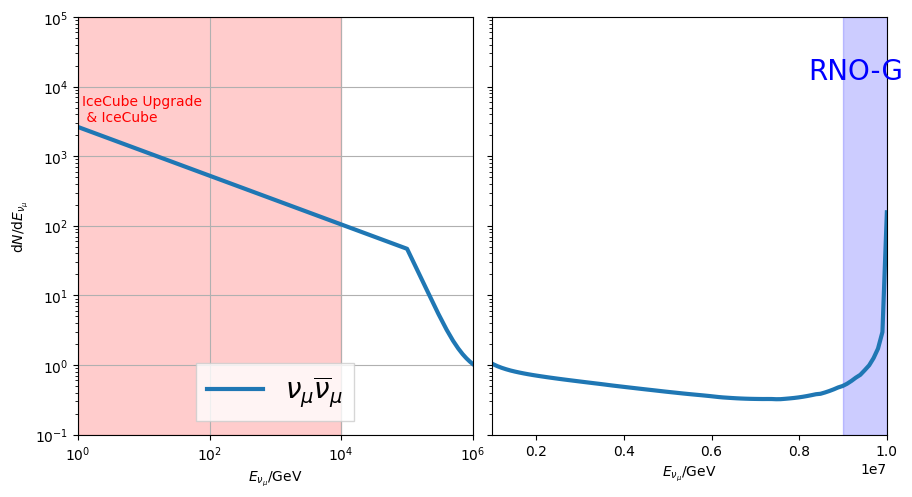

Solarize_Light2


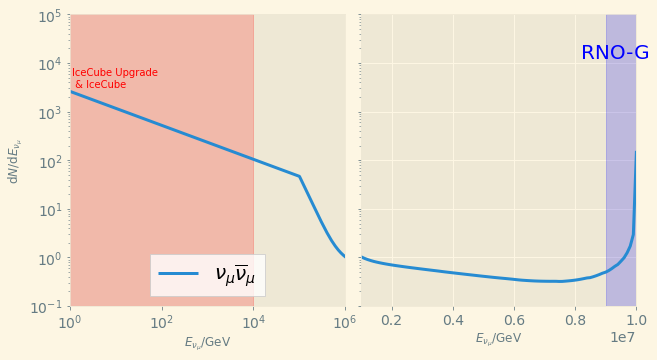

_classic_test_patch


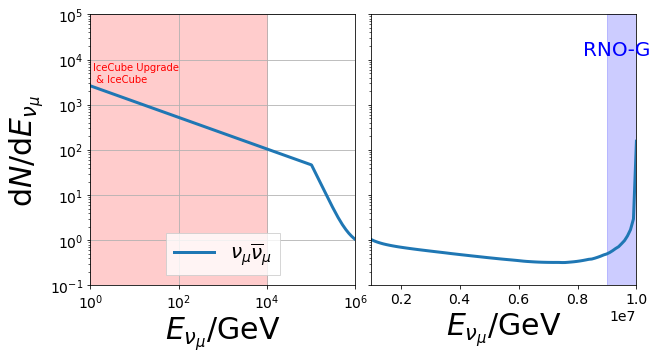

bmh


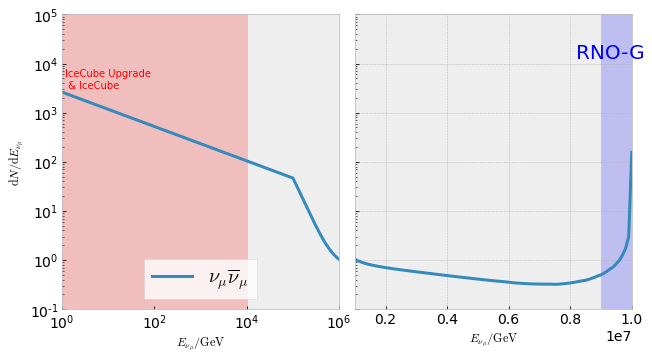

classic


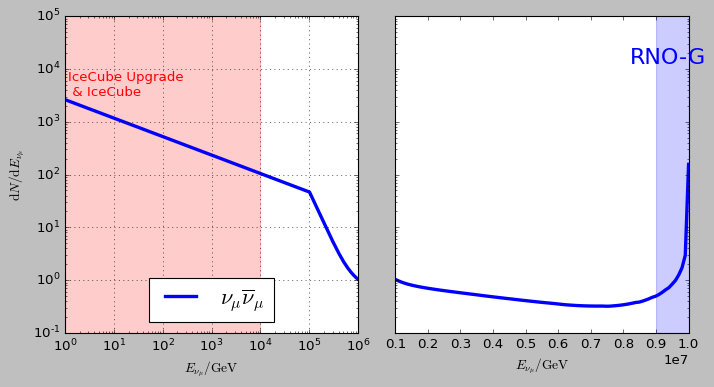

dark_background


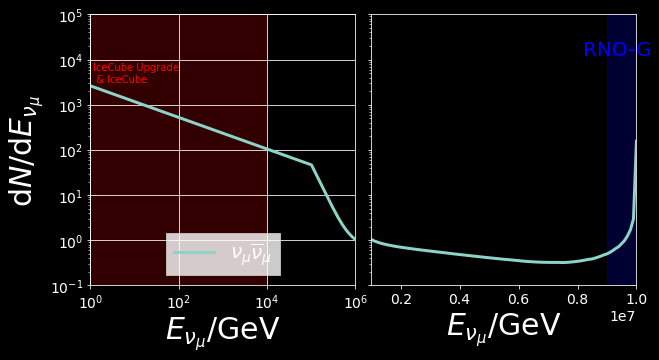

fast


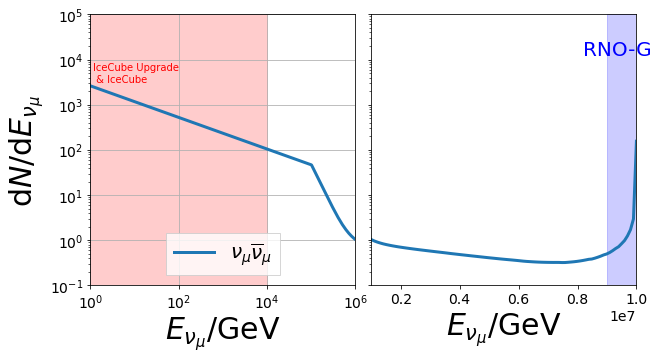

fivethirtyeight


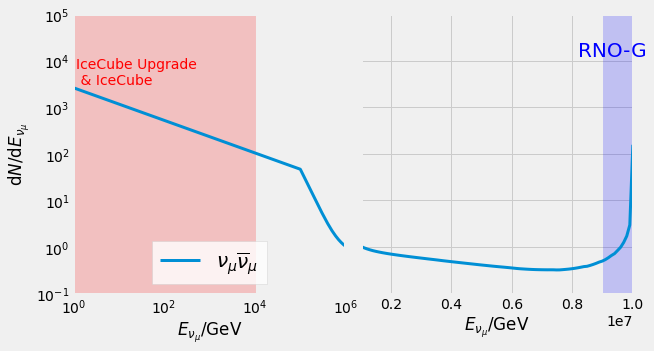

ggplot


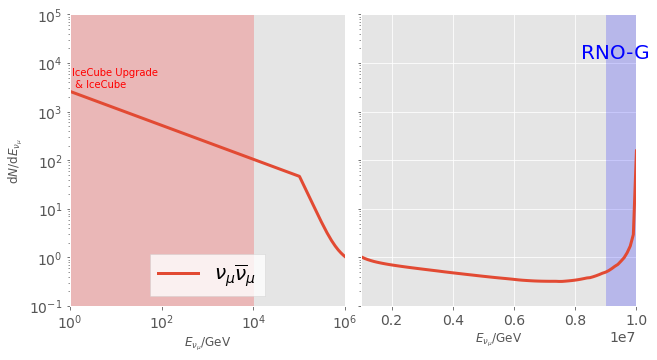

grayscale


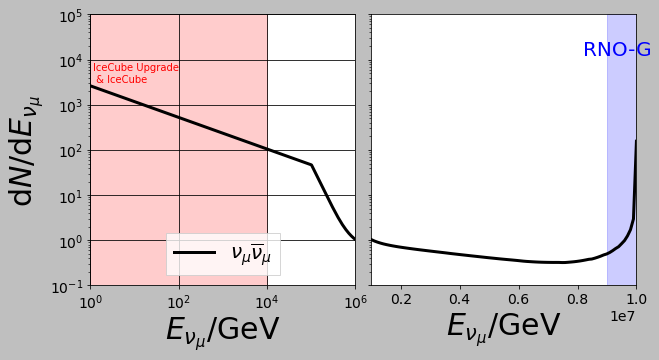

seaborn


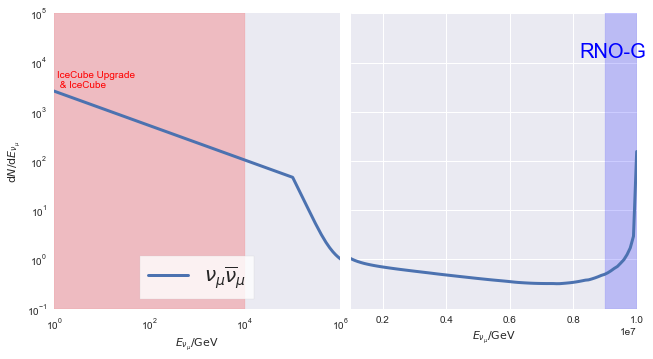

seaborn-bright


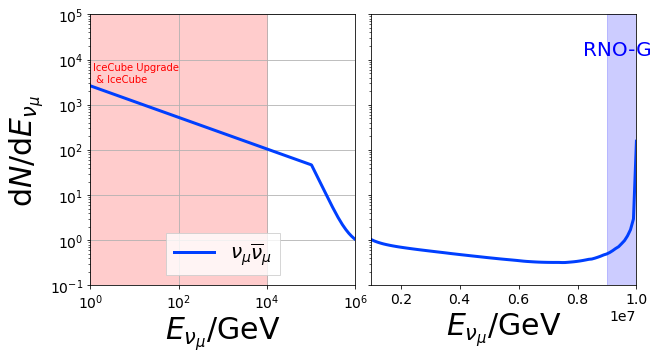

seaborn-colorblind


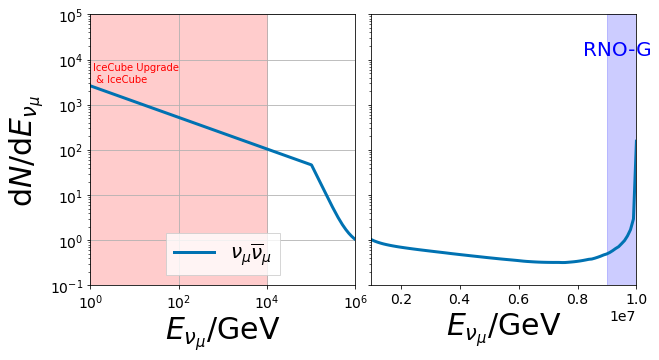

seaborn-dark


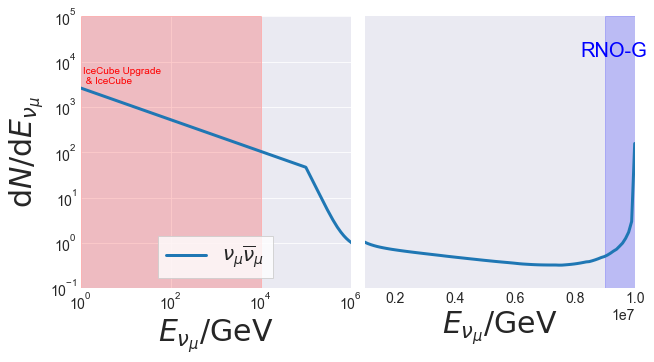

seaborn-dark-palette


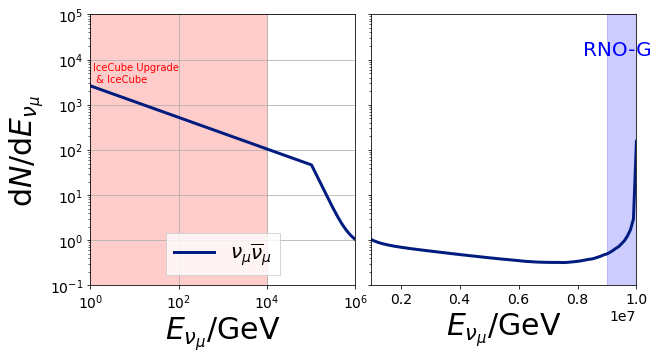

seaborn-darkgrid


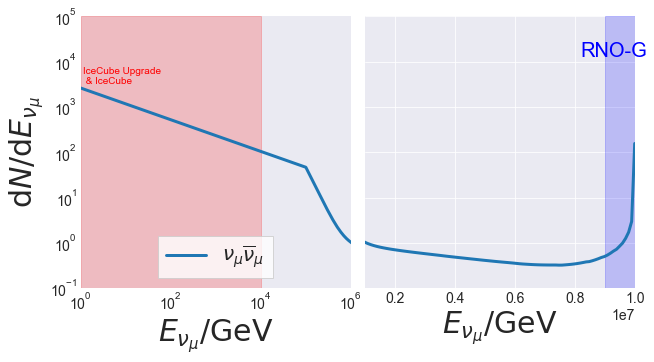

seaborn-deep


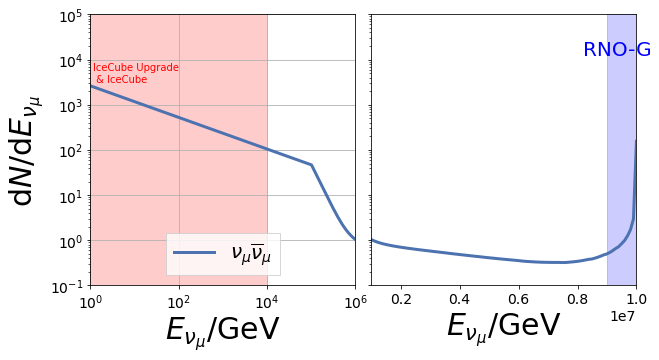

seaborn-muted


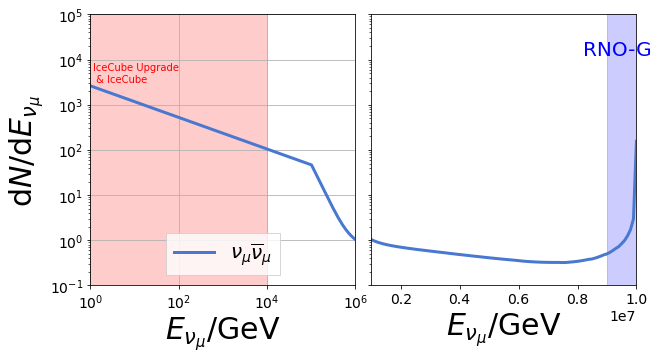

seaborn-notebook


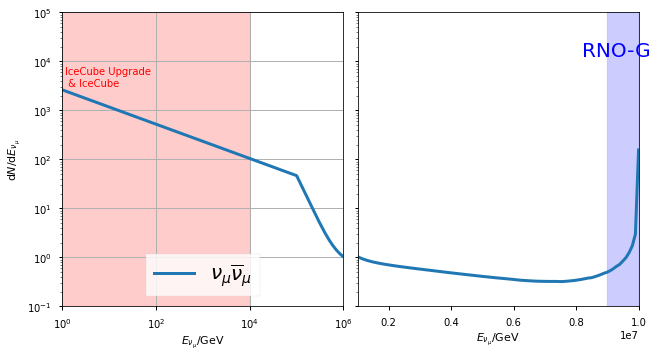

seaborn-paper


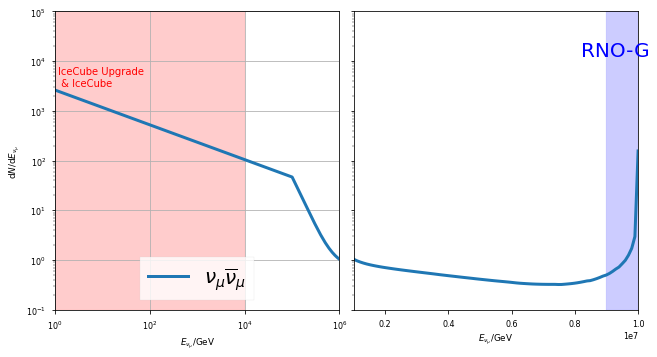

seaborn-pastel


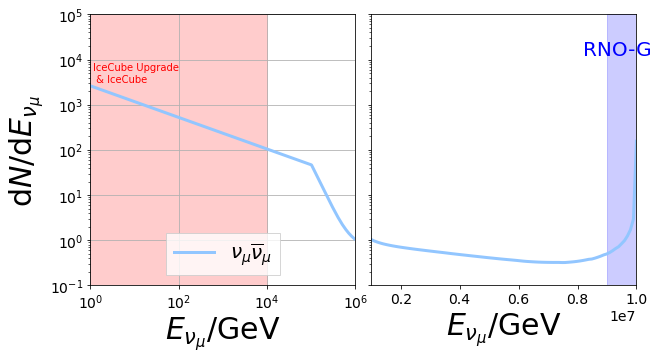

seaborn-poster


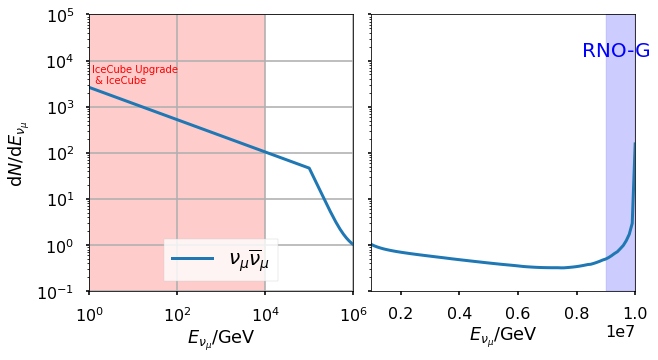

seaborn-talk


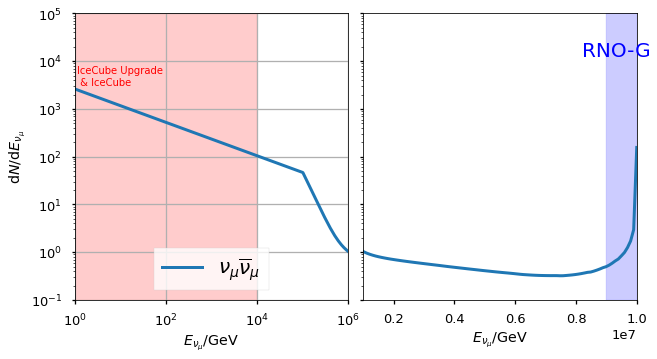

seaborn-ticks


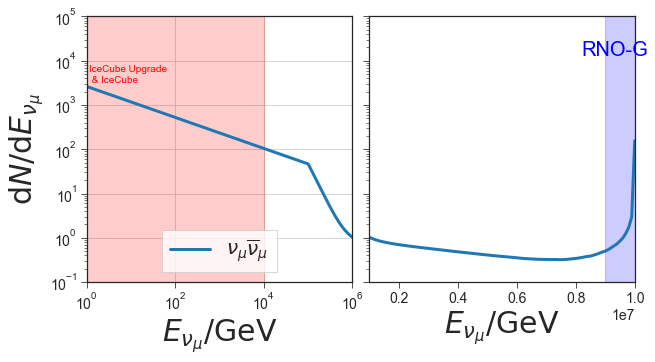

seaborn-white


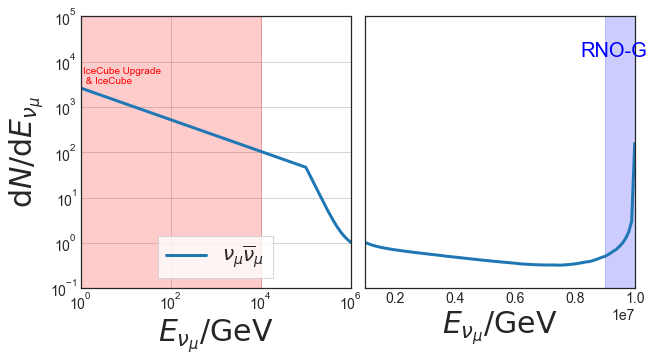

seaborn-whitegrid


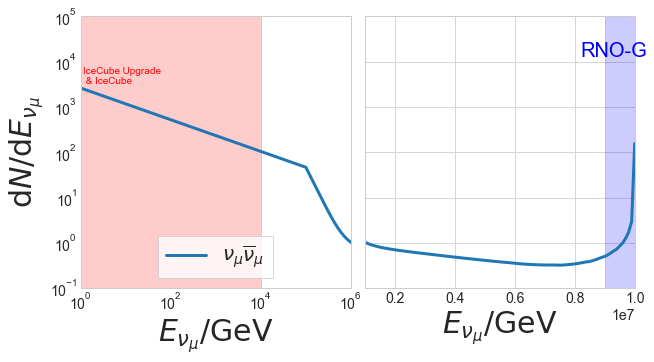

tableau-colorblind10


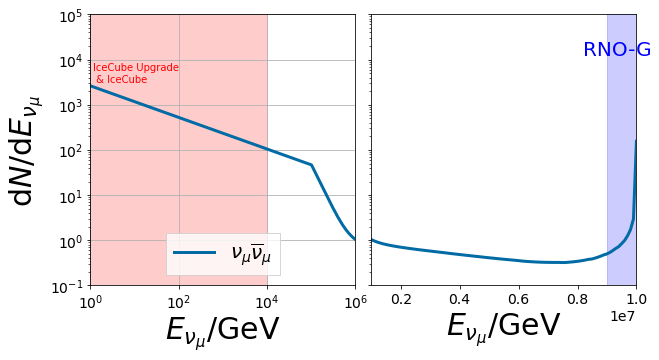

In [8]:
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        print (style)
        from matplotlib.gridspec import GridSpec

        fig, [ax_log, ax_lin] = plt.subplots(1, 2, sharey=True, figsize=(9, 5))

        plt.rcParams.update({'axes.titlesize': 18})
        plt.rcParams.update({'axes.labelsize': 30})
        plt.rcParams.update({'xtick.labelsize' : 14})
        plt.rcParams.update({'ytick.labelsize' : 14})
        plt.rcParams.update({'legend.fontsize' : 16})
        #    plt.rcParams.update({'figure.dpi': 600.})
        plt.rcParams.update({'lines.linewidth': 3})
        font = {'family': 'serif'}
        #fig  = plt.figure(figsize=(9, 5))
        ax_log.set_yscale("log")
        ax_log.set_xscale("log")
        #x = Flux_nu.iniE()/mass
        x = Flux_nu.iniE()*1e-9
        ax_log.plot(x,flux_ini_Halo_nu['nu_mu'],linewidth=3.0,label=r'$\nu_\mu\overline{\nu}_\mu$')
        ax_lin.plot(x,flux_ini_Halo_nu['nu_mu'],linewidth=3.0,label=r'$\nu_\mu\overline{\nu}_\mu$')
        ax_lin.set_yscale("log")

        #ax.plot(x,flux_ini_Halo_W['nu_mu'],linewidth=3.0,label=r'$W^+W^-$')
        #ax.plot(x,flux_ini_Halo_tau['nu_mu'],linewidth=3.0,label=r'$\tau^+\tau^-$')
        #ax.plot(x,flux_ini_Halo_b['nu_mu'],linewidth=3.0,label=r'$b\overline{b}$')
        #ax.plot(x,flux_ini_Halo_tau['nu_mu'],linewidth=3.0,label=r'$\mu^+\mu^-$')

        ax_log.set_xlabel(r'${E_{\nu_\mu}}/{\rm GeV}$', fontdict=font)
        ax_log.set_ylabel(r'$ {\rm d} N / {\rm d} E_{\nu_\mu} $', fontdict=font)
        ax_lin.set_xlabel(r'${E_{\nu_\mu}}/{\rm GeV}$', fontdict=font)

        #leg = ax.legend(frameon = 1, fancybox=False, loc='lower left', bbox_to_anchor=(-0.0175, 1., 1.035, 0),labelspacing=0.2, mode="expand", ncol=2)
        ax_log.legend(ncol=2, frameon= 1, facecolor="white", fancybox=False, loc="lower center", fontsize=20)
        fig.tight_layout()
        ax_log.set_xlim(1, 1e6)
        ax_lin.set_xlim(1e6,mass*1e-9)
        #ax.set_xscale("log")
        ax_log.set_ylim(1e-1,1e5)
        ax_log.axvspan(1, 1e4, alpha=0.2, color='red')
        ax_lin.axvspan(9e6, 1e7, alpha=0.2, color='blue')
        ax_log.text(0.01, 0.75, "IceCube Upgrade \n & IceCube", color="red", transform=ax_log.transAxes)
        ax_lin.text(0.8, 0.85, r"RNO-G", color="blue", fontsize=20, transform=ax_lin.transAxes)
        ax_log.grid()
        plt.show()

